# Selenium을 이용한 scrapping
_본 자료는 안수찬 강사님의 파이썬을 활용한 업무자동화 Camp (fast campus)의 강의자료를 기반으로 만들어졌습니다._  
만든이 : 김보섭  

## Selenium :: 자동화된 테스트
* Java, Python, ... :: Selenium  
사용하고자하는 browser에 해당하는 webdriver를 설치하고 활용할 것  
참고 : http://selenium-python.readthedocs.io/  
  
## 할 수 있는 동작
* 키를 입력한다.
* 스크롤을 내린다.
* 클릭을 한다.
* 페이지를 이동한다.
* 이전 페이지로 이동한다.
* alert 창을 끈다.
* 데이터를 추출한다. :: [1. 정적인 사이트 데이터 수집하기], [2. 동적인 사이트 데이터 수집하기]

## 할 수 있는 동작 (코드)
* find_element[s]_by_css_selector
    * get
    * send_keys
    * click
    * switch_to_frame + switch_to_default_content

## 사이트 유형별 (활용 module 및 간략 code)
1. 정적인 사이트 (requests + BeautifulSoup / lxml) :: requests.get / POST
2. 동적인 사이트 (requests + json)
                   json(string; Javascript Object Notation) ==> dict (response.json())
3. javascript로 동작하는 사이트 (driver.execute_script)
    - driver.find_elements_by_css_selector
    - element.text, element.get_attribute()

### 네이버 스포츠란 주요 뉴스 10개 제목 crawling 예제
BeautifulSoup와 selenium 활용 예제, 아래의 코드들이 대응  
* dom = BeautifulSoup(response.text, 'html.parser')
    * dom.select == driver.find_elements_by_css_selector
    * dom.select_one == driver.find_element_by_css_selector

#### Load modules 

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import matplotlib.pylab as plt
import os, sys
%matplotlib inline

### BeautifulSoup

In [2]:
# BeautifulSoup 이용
# 1. 정적인 유형
# requests.get(HTML), BeautifulSoup
# Versus
response = requests.get('http://sports.news.naver.com/wfootball/index.nhn')
dom = BeautifulSoup(response.text, 'html.parser')
dom_tmp = dom.select('div.home_news span')
[i.text.strip() for i in dom_tmp[1:]]

['[이벤트 발표] U-20 월드컵 결승전 티켓',
 '"바르셀로나 투란, 기내서 스포츠기자 폭행"',
 '벵거 감독 "음바페, 올 여름 이적에 신중해야"',
 '클롭 "제라드, 리버풀 감독 되고 싶어한다"',
 '前 인테르 감독 피올리, 피오렌티나로 부임',
 "도르트문트, 아약스 준우승 이끈 '보츠' 선임",
 '소튼, 반 다이크 불법 접근 문제로 리버풀 제소',
 '[오피셜] 아스널, 샬케 DF 콜라시나치 영입',
 "[풋볼N토크] '챔피언' 레알의 유벤투스 공략법!",
 '맨시티, 반 다이크 영입 포기…리버풀행 유력',
 '떠나려는 루카쿠 나비효과, 시구르드손까지?',
 "아스널, 음바페 영입에 '최고' 1760억 준비",
 "'유로파 준우승' 보츠, 도르트문트 차기 감독",
 '동료 환호할 때, 쓸쓸히 발걸음 돌린 하메스',
 'FIFA, 우루과이 인종차별 세리머니 진상조사',
 'UEFA 선정, 2016-17시즌 챔스 TOP 10골',
 '16-17 유럽 최고 공격수는? #EPL득점왕편',
 '아스널 떠나는 야야 사노고 "드디어 자유다"',
 "[U-20] 유럽 vs 남미 우승 다툼 '개봉박두'",
 '맨유, 린델로프 영입 착수…이적료 506억']

#### Selenium 

In [3]:
# IE, Chrome, Firefox == PhantomJS
# 본 예제에서는 Chrome browser를 활용한다. (추후 더 빠른 실행을 위해서는 PhantomJS를 활용한다.)
# driver = webdriver.Chrome() # Chrome으로 동작을 확인하고 싶으면!
driver = webdriver.Chrome()
driver.get('http://sports.news.naver.com/wfootball/index.nhn') # get요청을 보낸다.
# Selenium 이용
test = [i.text for i in driver.find_elements_by_css_selector('div.home_news span')[1:]]
test

['[이벤트 발표] U-20 월드컵 결승전 티켓',
 '"바르셀로나 투란, 기내서 스포츠기자 폭행"',
 '벵거 감독 "음바페, 올 여름 이적에 신중해야"',
 '클롭 "제라드, 리버풀 감독 되고 싶어한다"',
 '前 인테르 감독 피올리, 피오렌티나로 부임',
 "도르트문트, 아약스 준우승 이끈 '보츠' 선임",
 '소튼, 반 다이크 불법 접근 문제로 리버풀 제소',
 '[오피셜] 아스널, 샬케 DF 콜라시나치 영입',
 "[풋볼N토크] '챔피언' 레알의 유벤투스 공략법!",
 '맨시티, 반 다이크 영입 포기…리버풀행 유력',
 '떠나려는 루카쿠 나비효과, 시구르드손까지?',
 "아스널, 음바페 영입에 '최고' 1760억 준비",
 "'유로파 준우승' 보츠, 도르트문트 차기 감독",
 '동료 환호할 때, 쓸쓸히 발걸음 돌린 하메스',
 'FIFA, 우루과이 인종차별 세리머니 진상조사',
 'UEFA 선정, 2016-17시즌 챔스 TOP 10골',
 '16-17 유럽 최고 공격수는? #EPL득점왕편',
 '아스널 떠나는 야야 사노고 "드디어 자유다"',
 "[U-20] 유럽 vs 남미 우승 다툼 '개봉박두'",
 '맨유, 린델로프 영입 착수…이적료 506억']

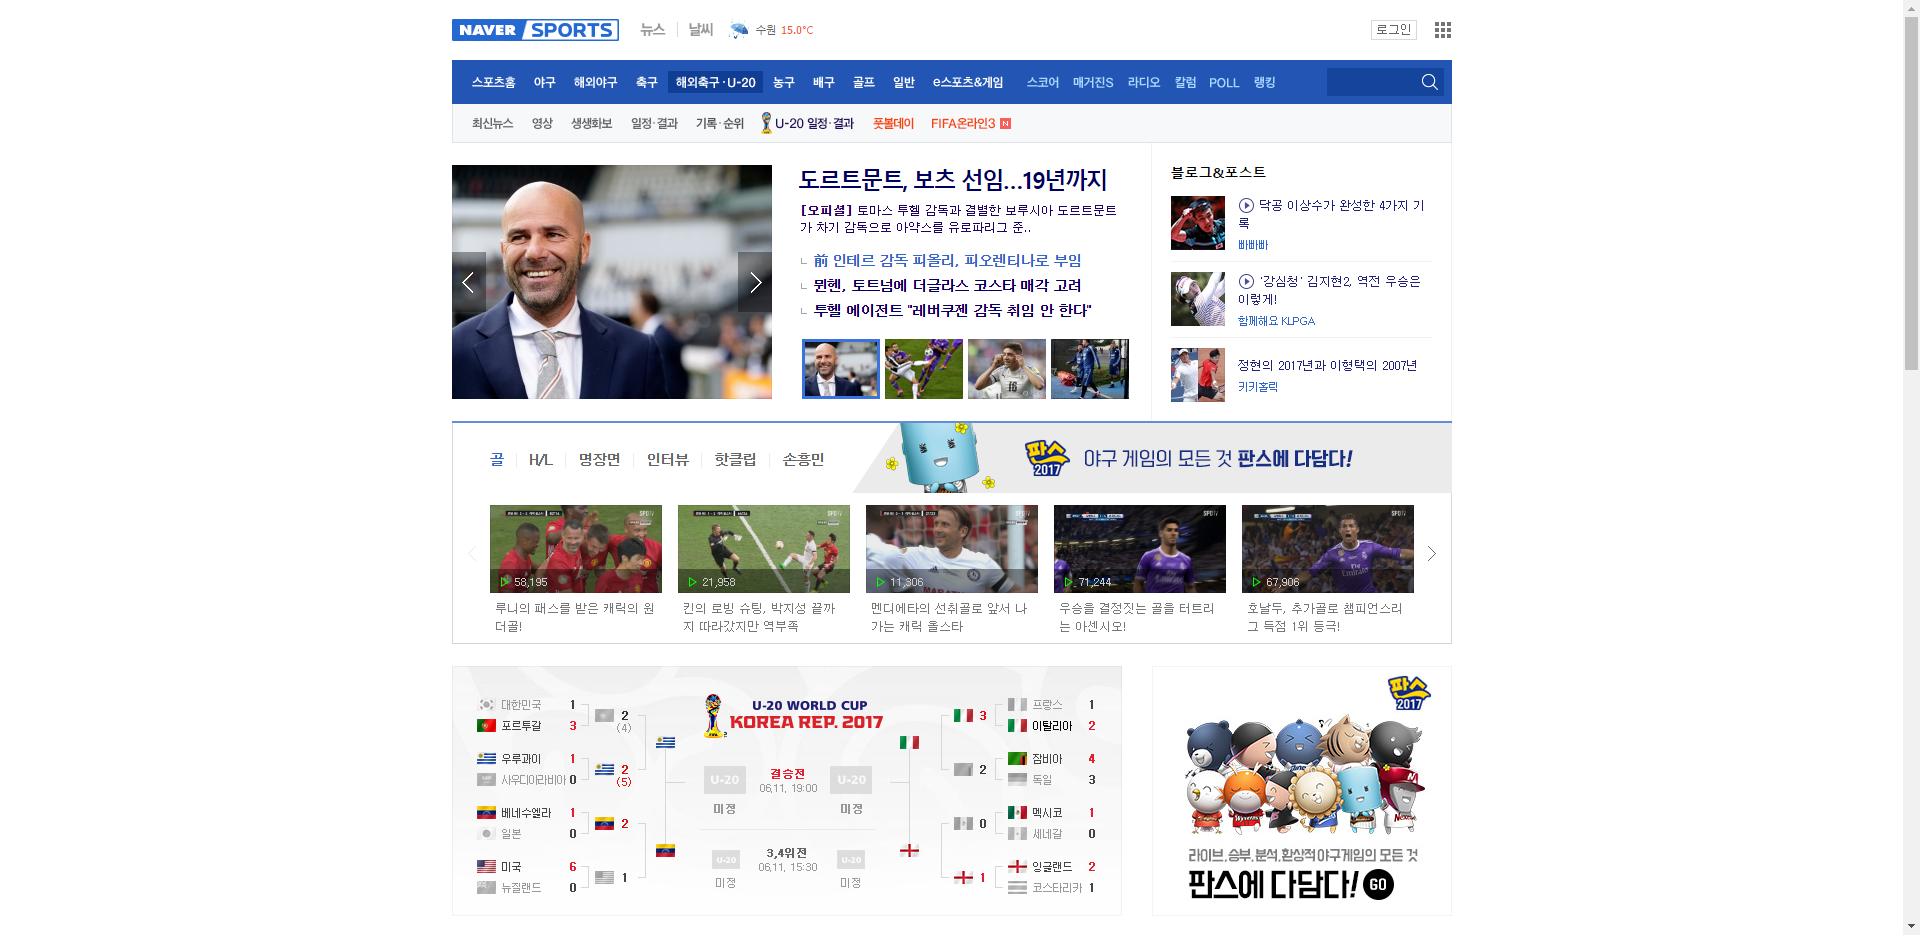

In [4]:
# screen shot 
# 내 browser가 보고있는 web page를 screen shot하는 기능으로 PhantomJs를 활용할 때 매우 유용
from IPython.display import Image
Image(driver.get_screenshot_as_png())

In [5]:
# 저장
image_text = driver.get_screenshot_as_png()
fp = open('screenshot.png', 'wb')
fp.write(image_text)
fp.close()

In [6]:
# selenium으로 작동시킨 web driver 종료
driver.close()

### 네이버 로그인 예제
https://nid.naver.com/nidlogin.login

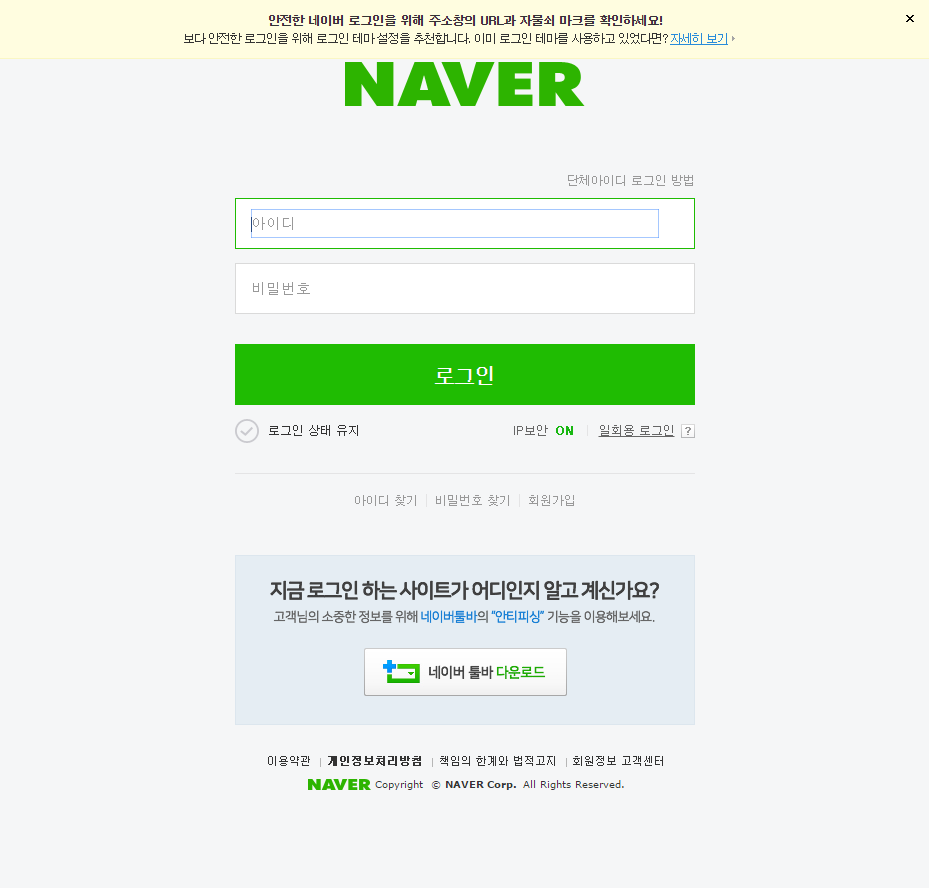

In [7]:
# 네이버 로그인
# https://nid.naver.com/nidlogin.login
driver = webdriver.Chrome()
driver.get('https://nid.naver.com/nidlogin.login')
Image(driver.get_screenshot_as_png())

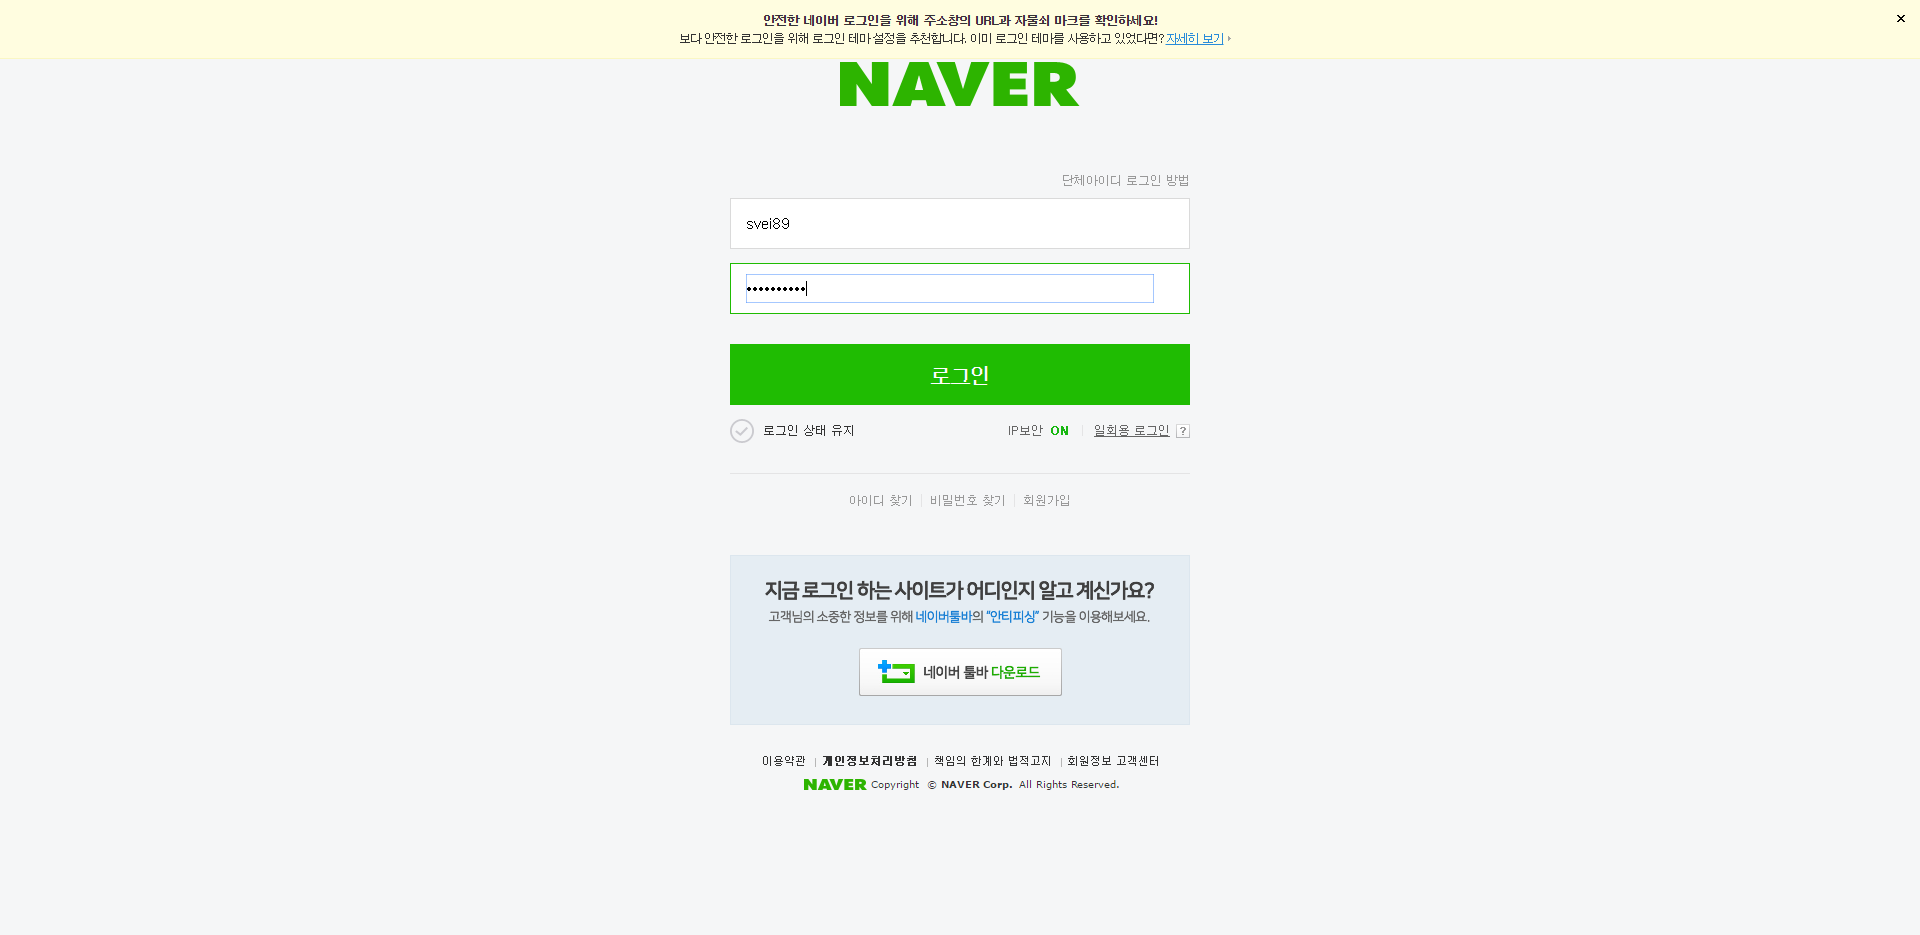

In [8]:
# id => 아이디 입력하고, pw => 비밀번호 입력하고,
username_element = driver.find_element_by_css_selector('#id')
username_element.send_keys('svei89')
pw_element = driver.find_element_by_css_selector('#pw')
pw_element.send_keys('dsba2017!!') # 예제작성을 위해 임의로 만든 비밀번호입니다. 이 코드 블럭 실행을 위해 임시로 사용하였습니다.
Image(driver.get_screenshot_as_png())

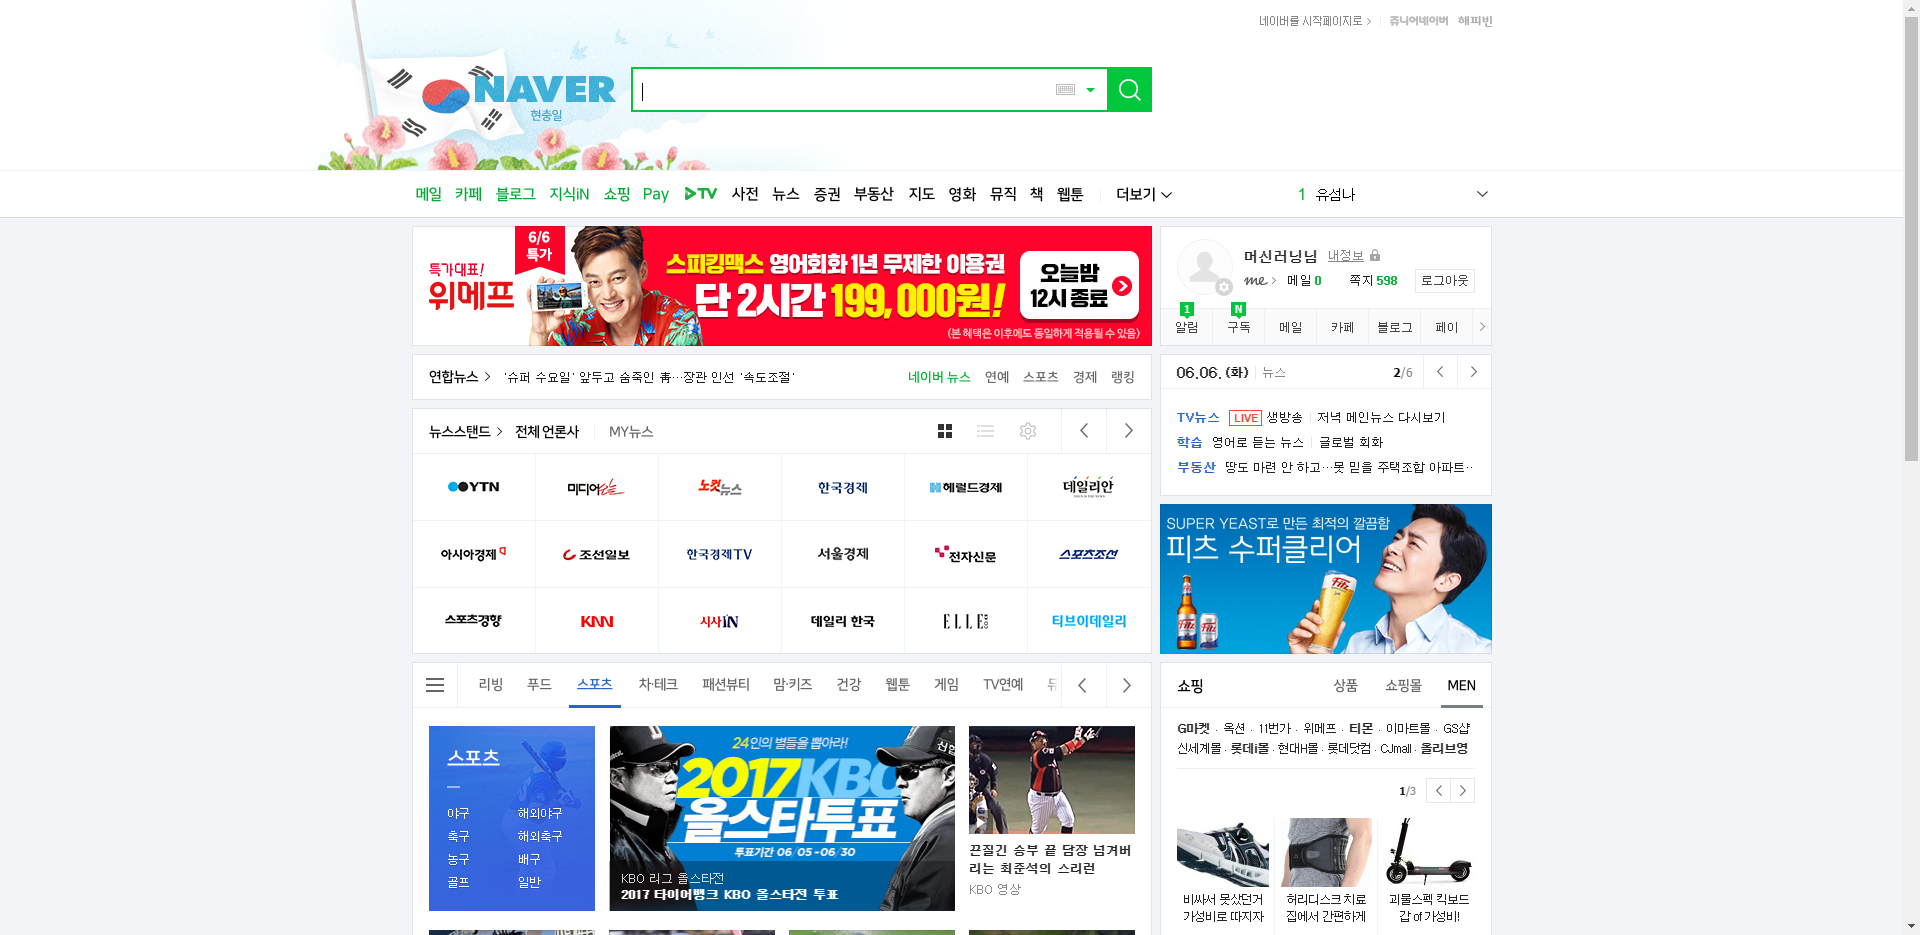

In [9]:
# 로그인 버튼 클릭!
login_element = driver.find_element_by_css_selector('input.btn_global')
login_element.click()
Image(driver.get_screenshot_as_png())

In [10]:
driver.close()

### browser의 javascript code 직접 실행 예제

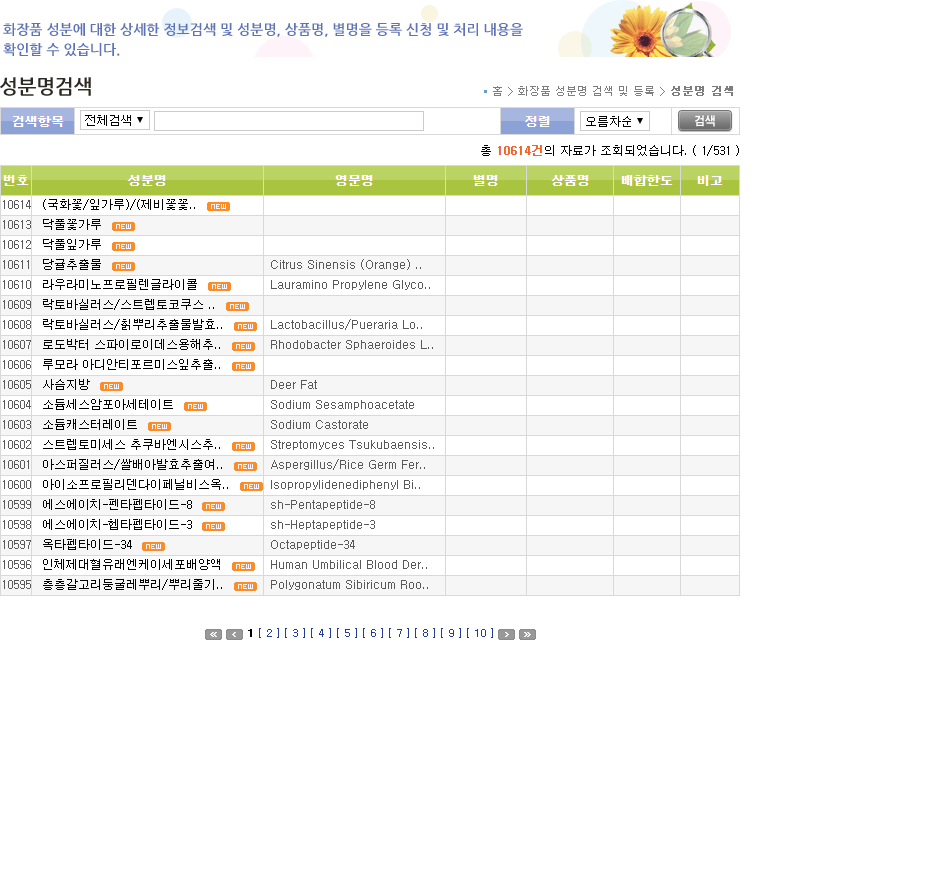

In [11]:
# 브라우저의 자바스크립트를 직접 실행하는 방법
driver = webdriver.Chrome()
driver.get('http://www.kcia.or.kr/cid/Document/020.Ingredient_shis/INGREDIENT_SHIS_10L.asp')
Image(driver.get_screenshot_as_png())

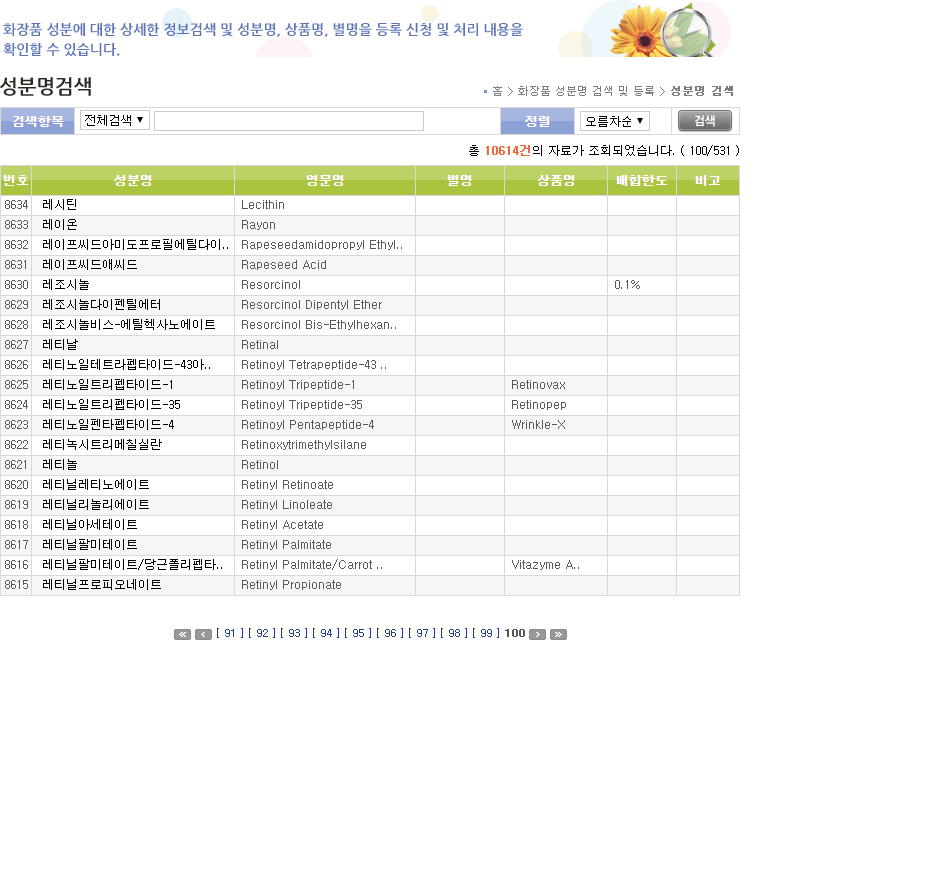

In [12]:
javascript_code = 'fGoPage(100)' # webbrowser의 요소검사 기능을 이용하여 확인
driver.execute_script(javascript_code)
Image(driver.get_screenshot_as_png())

In [13]:
driver.close()

### iframe example : 중고나라 apple 관련 제품 게시물 scrapping
중고나라 같은 네이버카페는 실제로 하나의 웹사이트로 보이지만, 실제로는 iframe을 이용하여 여러가지 웹사이트를 하나로 합쳐놓은 형태, 이 때 웹상의 구현은 iframe을 활용하여 이루어지며 본 예제와 같은 방법으로 대응가능

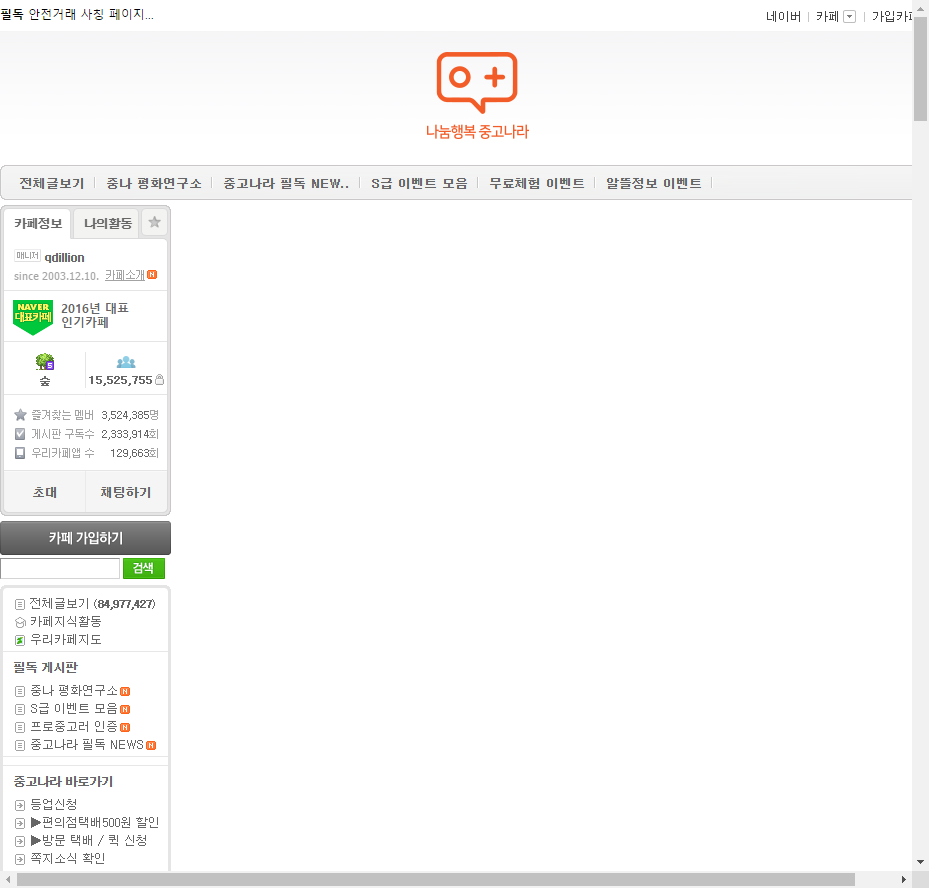

In [14]:
# 중고나라 접속 (iframe example)
# 키워드로 "검색"
driver = webdriver.Chrome()
url = 'https://cafe.naver.com/joonggonara'
driver.get(url)
Image(driver.get_screenshot_as_png())

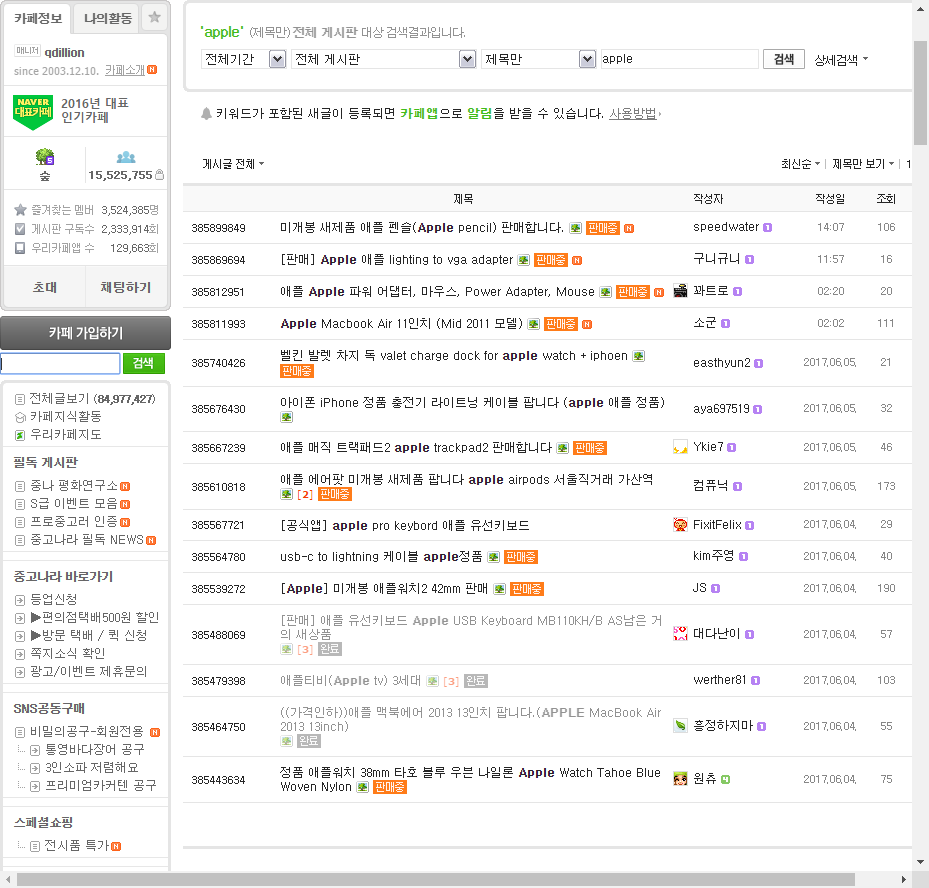

In [15]:
# javascript code는 요소검사로 확인할 것
driver.find_element_by_css_selector('input#topLayerQueryInput').send_keys('apple') # 검색란에 apple 입력
driver.execute_script('searchBoard()') # 검색버튼을 누르는 행위가 결국 javascript code를 실행시키게 되므로 직접 실행
Image(driver.get_screenshot_as_png())

In [16]:
# iframe 변환
# 게시글 제목 crawling
iframe_element = driver.find_element_by_css_selector('iframe#cafe_main')
driver.switch_to.frame(iframe_element)
test = [i.text for i in driver.find_elements_by_css_selector('table.board-box td.board-list a.m-tcol-c')]
test

['미개봉 새제품 애플 펜슬(Apple pencil) 판매합니다.',
 '[판매] Apple 애플 lighting to vga adapter',
 '애플 Apple 파워 어댑터, 마우스, Power Adapter, Mouse',
 'Apple Macbook Air 11인치 (Mid 2011 모델)',
 '벨킨 발렛 차지 독 valet charge dock for apple watch + iphoen',
 '아이폰 iPhone 정품 충전기 라이트닝 케이블 팝니다 (apple 애플 정품)',
 '애플 매직 트랙패드2 apple trackpad2 판매합니다',
 '애플 에어팟 미개봉 새제품 팝니다 apple airpods 서울직거래 가산역',
 '[공식앱] apple pro keybord 애플 유선키보드',
 'usb-c to lightning 케이블 apple정품',
 '[Apple] 미개봉 애플워치2 42mm 판매',
 '[판매] 애플 유선키보드 Apple USB Keyboard MB110KH/B AS남은 거의 새상품',
 '애플티비(Apple tv) 3세대',
 '((가격인하))애플 맥북에어 2013 13인치 팝니다.(APPLE MacBook Air 2013 13inch)',
 '정품 애플워치 38mm 타호 블루 우븐 나일론 Apple Watch Tahoe Blue Woven Nylon']

In [17]:
driver.close()

### 다방 매물정보 scrapping 예제

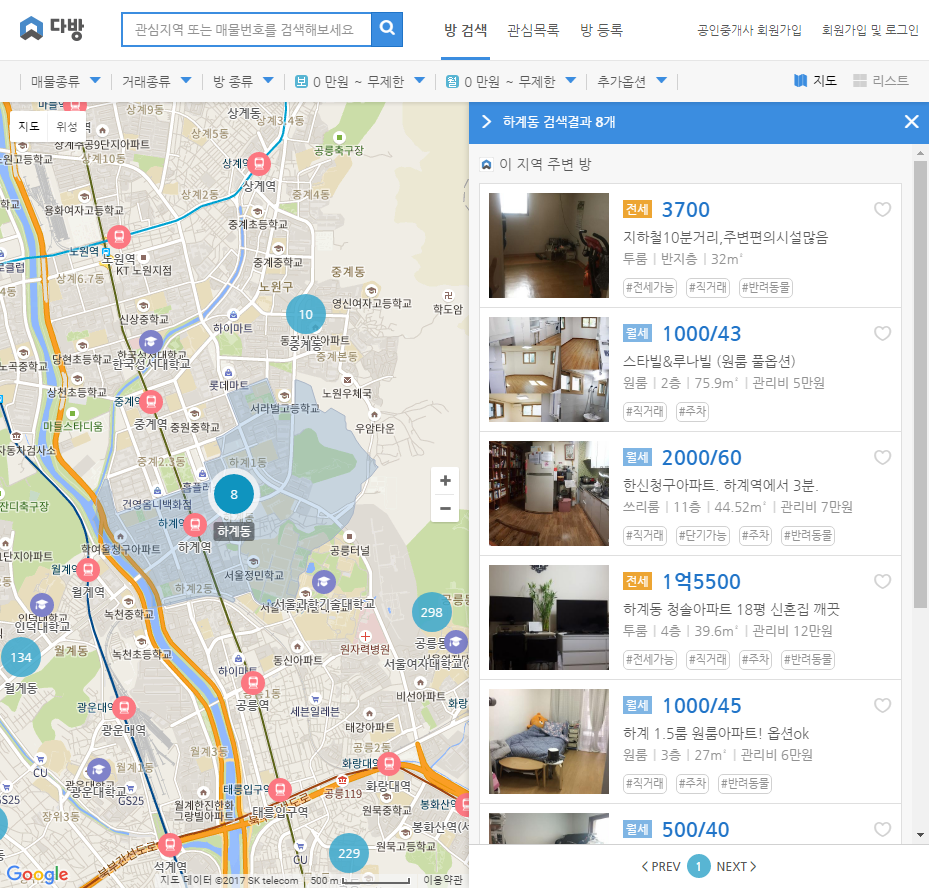

In [18]:
# 다방 (예제), 하계동 예제
# 아래의 코드로 들어가서 나오는 매물정보 8개에 대해서
driver = webdriver.Chrome()
driver.get('https://www.dabangapp.com/search#/map?id=11350104&type=region&filters=%7B%22deposit-range%22%3A%5B0%2C999999%5D%2C%22price-range%22%3A%5B0%2C999999%5D%2C%22room-type%22%3A%5B0%2C1%2C2%2C3%2C4%2C5%5D%2C%22deal-type%22%3A%5B0%2C1%5D%2C%22location%22%3A%5B%5B127.05002582839779%2C37.61016662527715%5D%2C%5B127.09276951125912%2C37.6666477337331%5D%5D%7D&position=%7B%22center%22%3A%5B127.07139766982846%2C37.63841254667293%5D%2C%22zoom%22%3A14%7D&cluster=%7B%22name%22%3A%22%ED%95%98%EA%B3%84%EB%8F%99%22%7D')
Image(driver.get_screenshot_as_png())

In [19]:
room_elements = driver.find_elements_by_css_selector('li.Room-item')
href_list = [room_element.find_element_by_css_selector('a').get_attribute('href') for room_element in room_elements]
href_list

['https://www.dabangapp.com/room/58f2f9fe7402e727dbdbe50e',
 'https://www.dabangapp.com/room/590eb99f7155110240da3c3a',
 'https://www.dabangapp.com/room/5911a34206e10d74a0be70e9',
 'https://www.dabangapp.com/room/590ecb60b5df65499e54ad89',
 'https://www.dabangapp.com/room/591a97233ab31d18d34f31ab',
 'https://www.dabangapp.com/room/592f990be6c76835555a77a4',
 'https://www.dabangapp.com/room/5926421bc6b754548488c4f2',
 'https://www.dabangapp.com/room/5917472b591c907f837f7c17']

In [20]:
room_info = []
for num ,room in enumerate(href_list):
    driver.get(room)
    tmp_type = driver.find_element_by_css_selector('div.room-info-inner span.room-types').text
    tmp_price = driver.find_element_by_css_selector('div.room-info-inner span.room-price').text
    tmp_des = driver.find_element_by_css_selector('div.room-description-wrap').text.split('\n')

    driver.find_element_by_css_selector('div.contact-view-button-wrap').click()
    tmp_phone = driver.find_element_by_css_selector('span.number').text.split(':')[1].strip()
    
    room_info.append({'type' : tmp_type, 'price' : tmp_price, 'description' : tmp_des, 'phone' : tmp_phone})
    if num == len(href_list) - 1:
        driver.close()

In [21]:
import pandas as pd
pd.DataFrame(room_info)

,description,phone,price,type
0,"[지하철10분거리,주변편의시설많음, 서울특별시 노원구 하계동]",01050092271,3700만원,투룸 전세
1,"[스타빌&루나빌 (원룸 풀옵션), 서울특별시 노원구 하계동]",010-4527-5704,1000/43만원,원룸 월세
2,"[한신청구아파트. 하계역에서 3분., 서울특별시 노원구 하계동]",01023106007,2000/60만원,쓰리룸 월세
3,"[하계동 청솔아파트 18평 신혼집 깨끗, 서울특별시 노원구 하계동]",010-4119-0413,1억5500만원,투룸 전세
4,"[하계 1.5룸 원룸아파트! 옵션ok, 서울특별시 노원구 하계동]",01023726734,1000/45만원,원룸 월세
5,"[대진고등학교 및 과기대 협동문, 서울특별시 노원구 하계동]",01047019393,500/40만원,투룸 월세
6,"[하계역 3분거리 주차가능 신축3년차, 서울특별시 노원구 하계동]",010-8704-9102,1000/45만원,원룸 월세
7,"[7호선 하계역 30초 한신청구아파트, 서울특별시 노원구 하계동]",01025063391,500/48만원,아파트 월세
